In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.2.5)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate, FBeta
from fastai.callback.core import *

In [ ]:
data = ImageDataLoaders.from_folder(path='drive/My Drive/lettuce_new',
                                  item_tfms=RandomResizedCrop(256, min_scale=0.5), 
                                  train = 'lettuce_new', 
                                  valid_pct=0.15,
                                  batch_tfms=aug_transforms(),
                                  size =256,
                                  bs=10)

In [ ]:
data.vocab

['lettuce_Septoria_blight', 'lettuce_bacterial', 'lettuce_healthy', 'lettuce_powdery_mildew']

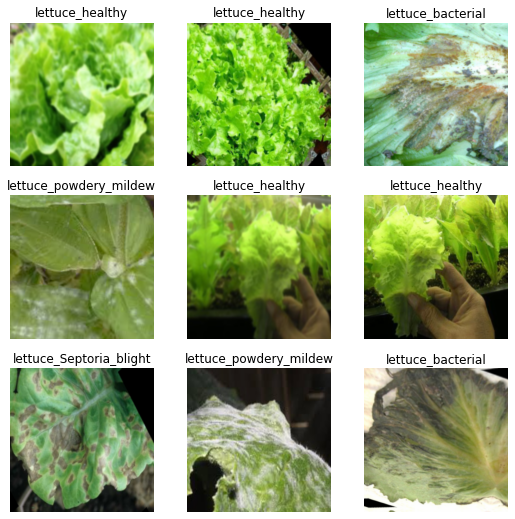

In [ ]:
data.show_batch()

In [ ]:
learn = cnn_learner(data,models.resnet50, loss_func=CrossEntropyLossFlat(), metrics= accuracy)

In [ ]:
learn.save("model")

Path('drive/My Drive/lettuce_new/models/model.pth')

In [ ]:
learn.fit_one_cycle(10, lr_max=slice(1e-4,1e-2), cbs=[SaveModelCallback(monitor="accuracy")])

epoch,train_loss,valid_loss,accuracy,time
0,1.396281,0.565675,0.837209,00:05
1,0.914443,1.090802,0.790698,00:04
2,0.802984,2.023678,0.744186,00:04
3,0.698395,1.328233,0.790698,00:04
4,0.669997,0.280690,0.883721,00:04
5,0.611931,0.847680,0.883721,00:04
6,0.559592,0.558205,0.883721,00:04
7,0.477784,0.491122,0.930233,00:04
8,0.362666,0.405284,0.953488,00:04
9,0.320038,0.342685,0.953488,00:04


Better model found at epoch 0 with accuracy value: 0.8372092843055725.
Better model found at epoch 4 with accuracy value: 0.8837209343910217.
Better model found at epoch 7 with accuracy value: 0.930232584476471.
Better model found at epoch 8 with accuracy value: 0.9534883499145508.


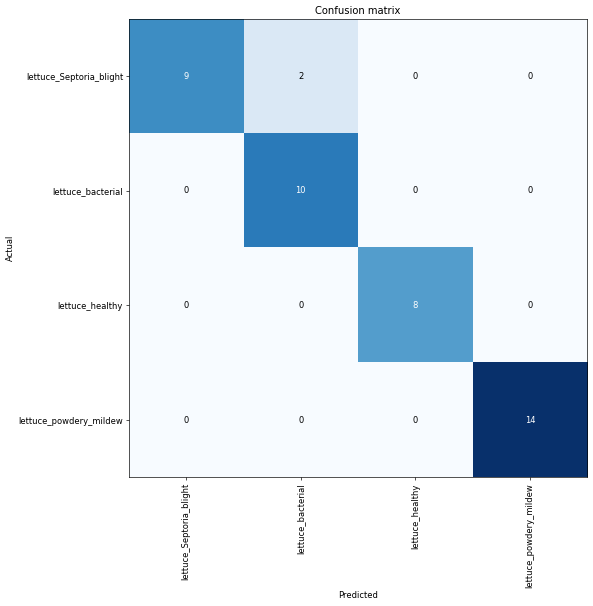

In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)

interpret.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [ ]:
 learn.export('/content/lettuce_new/') 